##### Unione dataset

In [1]:
from fastai.tabular.all import *
from warnings import simplefilter
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
set_seed(42)
simplefilter(action="ignore", category=FutureWarning)

*Pulizia dati cromosoma 22*

In [2]:
df = pd.read_csv('clinvar.22.dbnsfp.vcf', sep='\t')
df = df.apply(lambda x: x.str.split(';') if x.dtype == "object" else x)
df = df.map(lambda x: x.remove('') if type(x) is list and '' in x else x)

l = []

for col in df.columns:
    if df[col].apply(lambda x: len(x) if type(x) is list else list()).equals(df['aapos'].apply(lambda x: len(x) if type(x) is list else list())):
        l.append(col)

l.append('TSL')
df = df.explode(l)
df = df.map(lambda x: x[0] if type(x) is list and len(x) == 1 else x)
df.replace(to_replace='.', value=np.nan, inplace=True)
df.dropna(axis='rows', how='any', inplace=True, subset=['clinvar_clnsig'])
####
#df.dropna(axis='columns', thresh=int(len(df.index)*0.8), inplace=True)
####
df = df.apply(pd.to_numeric, errors='ignore')


l1 = []

for col in df.columns:
    if df[col].map(lambda x: True if type(x) is list else False).any():
        l1.append(col)

for col in l1:
    v = df[col].explode().value_counts()
    toRemove = v[v < int(len(df[col].explode()) * 0.10)].index
    df[col] = df[col].map(lambda x: [i for i in x if i not in toRemove] if type(x) is list else x)

/tmp/ipykernel_617/1942847823.py:1: DtypeWarning: Columns (98,99,101,102,131,132,133,134,135,136,153,154,155,169,170,171,172,646,650,651,675,676,677,678,679,681,682,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,705,706,717,718,719,720,721,722,723,724,725,730) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clinvar.22.dbnsfp.vcf', sep='\t')


In [3]:
df.apply(pd.to_numeric, errors='ignore')
#df.replace(to_replace=np.nan, value=0, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'not_provided'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'protective'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'risk_factor'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_risk_factor'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_other,_risk_factor'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'drug_response'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'association'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Affects'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'other'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'drug_response,_risk_factor'].index, inplace=True)
df.replace(to_replace='Conflicting_interpretations_of_pathogenicity', value='Uncertain_significance', inplace=True)
df.replace(to_replace='Benign/Likely_benign', value='Likely_benign', inplace=True)
df.replace(to_replace='Likely_benign,_other', value='Likely_benign', inplace=True)
df.replace(to_replace='Likely_benign,_drug_response,_other', value='Likely_benign', inplace=True)
df.replace(to_replace='Benign/Likely_benign,_other', value='Likely_benign', inplace=True)
df.replace(to_replace='Pathogenic/Likely_pathogenic', value='Likely_pathogenic', inplace=True)
df.replace(to_replace='Benign/Likely_benign,_risk_factor', value='Likely_pathogenic', inplace=True)
df.reset_index(drop=True, inplace=True)

*Pulizia cromosoma 21*

In [4]:
df1 = pd.read_csv('clinvar.hg19.chr21.dbnsfp.tsv', sep='\t')
df1 = df1.apply(lambda x: x.str.split(';') if x.dtype == "object" else x)
df1 = df1.map(lambda x: x.remove('') if type(x) is list and '' in x else x)

l = []

for col in df1.columns:
    if df1[col].apply(lambda x: len(x) if type(x) is list else list()).equals(df1['aapos'].apply(lambda x: len(x) if type(x) is list else list())):
        l.append(col)

l.append('TSL')
df1 = df1.explode(l)
df1 = df1.map(lambda x: x[0] if type(x) is list and len(x) == 1 else x)
df1.replace(to_replace='.', value=np.nan, inplace=True)
df1.dropna(axis='rows', how='any', inplace=True, subset=['clinvar_clnsig'])
#####
#df1.dropna(axis='columns', thresh=int(len(df1.index)*0.8), inplace=True)
#####
df1 = df1.apply(pd.to_numeric, errors='ignore')


l1 = []

for col in df1.columns:
    if df1[col].map(lambda x: True if type(x) is list else False).any():
        l1.append(col)

for col in l1:
    v = df1[col].explode().value_counts()
    toRemove = v[v < int(len(df1[col].explode()) * 0.10)].index
    df1[col] = df1[col].map(lambda x: [i for i in x if i not in toRemove] if type(x) is list else x)

/tmp/ipykernel_617/800033988.py:1: DtypeWarning: Columns (98,99,101,102,131,132,133,134,135,136,153,154,155,169,170,171,172,646,650,651,675,676,677,678,679,681,682,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,705,706,717,718,719,720,721,722,723,724,725,730) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('clinvar.hg19.chr21.dbnsfp.tsv', sep='\t')


In [5]:
df1.apply(pd.to_numeric, errors='ignore')
#df1.replace(to_replace=np.nan, value=0, inplace=True)
df1.drop(axis='index', labels=df1[df1.clinvar_clnsig == 'not_provided'].index, inplace=True)
df1.drop(axis='index', labels=df1[df1.clinvar_clnsig == 'protective'].index, inplace=True)
df1.drop(axis='index', labels=df1[df1.clinvar_clnsig == 'risk_factor'].index, inplace=True)
df1.drop(axis='index', labels=df1[df1.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_risk_factor'].index, inplace=True)
df1.drop(axis='index', labels=df1[df1.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_other,_risk_factor'].index, inplace=True)
df1.replace(to_replace='Conflicting_interpretations_of_pathogenicity', value='Uncertain_significance', inplace=True)
df1.replace(to_replace='Benign/Likely_benign', value='Benign', inplace=True)
df1.replace(to_replace='Pathogenic/Likely_pathogenic', value='Pathogenic', inplace=True)
df1.reset_index(drop=True, inplace=True)

*Pulizia cromosoma 20*

In [6]:
df2 = pd.read_csv('dbsnp.common.20.intervar.hg19_multianno.txt', sep='\t')
df2 = df2.drop(df2[df2['CLNSIG'] == '.'].index)
df2 = df2.map(lambda x: x.split(';') if type(x) is str and len(x.split(';')) > 1 else x)
df2 = df2.map(lambda x: x.remove('') if type(x) is list and '' in x else x)
l = []

for col in df2.columns:
    if df2[col].apply(lambda x: True if type(x) is list and len(x) > 2 else False).any():
        l.append(col)

for col in l:
    if col == 'Interpro_domain':
        df2 = df2.explode(col)
    else:
        df2.drop(col, axis=1, inplace=True)

df2 = df2.map(lambda x: x[0] if type(x) is list else x)
df2.replace(to_replace='.', value=np.nan, inplace=True)
df2.dropna(axis='rows', how='any', inplace=True, subset=['CLNSIG'])
#df2.dropna(axis='columns', thresh=int(len(df2.index)*0.8), inplace=True)
df2 = df2.apply(pd.to_numeric, errors='ignore')

df2.apply(pd.to_numeric, errors='ignore')
#df2.replace(to_replace=np.nan, value=0, inplace=True)
df2.drop(axis='index', labels=df2[df2.CLNSIG == 'not_provided'].index, inplace=True)
df2.drop(axis='index', labels=df2[df2.CLNSIG == 'protective'].index, inplace=True)
df2.drop(axis='index', labels=df2[df2.CLNSIG == 'risk_factor'].index, inplace=True)
df2.drop(axis='index', labels=df2[df2.CLNSIG == 'Conflicting_interpretations_of_pathogenicity,_risk_factor'].index, inplace=True)
df2.drop(axis='index', labels=df2[df2.CLNSIG == 'Conflicting_interpretations_of_pathogenicity,_other,_risk_factor'].index, inplace=True)
df2.drop(axis='index', labels=df2[df2.CLNSIG == 'association'].index, inplace=True)
df2.drop(axis='index', labels=df2[df2.CLNSIG == 'drug_response'].index, inplace=True)
df2.replace(to_replace='Conflicting_interpretations_of_pathogenicity', value='Uncertain_significance', inplace=True)
df2.replace(to_replace='Benign/Likely_benign', value='Benign', inplace=True)
df2.replace(to_replace='Pathogenic/Likely_pathogenic', value='Pathogenic', inplace=True)
df2.reset_index(drop=True, inplace=True)
df2 = df2.rename({"CLNSIG": "clinvar_clnsig", "Ref": "ref", "Alt": "alt", "Chr": "#chr"}, axis="columns")

In [7]:
a = np.intersect1d(df.columns, df1.columns)
b = np.intersect1d(df2.columns, a)
df_concat = pd.concat([df[b], df1[b], df2[b]])
df_concat.dropna(axis='columns', thresh=int(len(df2.index)*0.8), inplace=True)
df_concat.replace(to_replace=np.nan, value=0, inplace=True)

In [8]:
l2 = []

for col in df_concat.columns:
    if df_concat[col].map(lambda x: True if type(x) is list else False).any():
        l2.append(col)

df_concat.drop(axis='columns', labels=l2, inplace=True)

In [9]:
df_concat['clinvar_clnsig'].value_counts()

clinvar_clnsig
Uncertain_significance    38061
Pathogenic                 6415
Benign                     5634
Likely_pathogenic          3979
Likely_benign              3101
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

df_concat, df_test = train_test_split(df_concat, test_size=0.2)

In [14]:
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df_concat))
df_data = df_concat.drop(columns=['clinvar_clnsig'], inplace=False)
num_cols = df_data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_data.select_dtypes(include=[object]).columns.tolist()
df_concat = df_concat.sample(frac=1).reset_index(drop=True)

In [15]:
to = TabularPandas(df_concat, procs=[Categorify, FillMissing],
                   cat_names = cat_cols,
                   cont_names = num_cols,
                   y_names='clinvar_clnsig',
                    y_block=CategoryBlock(),
                   splits=splits)

In [154]:
dls = to.dataloaders(bs=1024)
dls.show_batch()

,BayesDel_addAF_pred,BayesDel_noAF_pred,ClinPred_pred,DEOGEN2_pred,FATHMM_pred,Interpro_domain,LIST-S2_pred,LRT_pred,M-CAP_pred,MetaLR_pred,MetaRNN_pred,MetaSVM_pred,MutPred_score,MutationAssessor_pred,PROVEAN_pred,Polyphen2_HDIV_pred,Polyphen2_HVAR_pred,PrimateAI_pred,SIFT4G_pred,SIFT_pred,alt,fathmm-MKL_coding_pred,fathmm-XF_coding_pred,ref,#chr,BayesDel_addAF_rankscore,BayesDel_addAF_score,BayesDel_noAF_rankscore,BayesDel_noAF_score,CADD_phred,CADD_raw,CADD_raw_rankscore,ClinPred_rankscore,ClinPred_score,DANN_rankscore,DANN_score,DEOGEN2_rankscore,DEOGEN2_score,Eigen-PC-raw_coding,Eigen-PC-raw_coding_rankscore,Eigen-raw_coding,Eigen-raw_coding_rankscore,FATHMM_converted_rankscore,FATHMM_score,GERP++_NR,GERP++_RS,GERP++_RS_rankscore,GenoCanyon_rankscore,GenoCanyon_score,LIST-S2_rankscore,LIST-S2_score,LRT_converted_rankscore,LRT_score,M-CAP_rankscore,M-CAP_score,MPC_rankscore,MPC_score,MVP_rankscore,MVP_score,MetaLR_rankscore,MetaLR_score,MetaRNN_rankscore,MetaRNN_score,MetaSVM_rankscore,MetaSVM_score,MutPred_rankscore,MutationAssessor_rankscore,MutationAssessor_score,MutationTaster_converted_rankscore,PROVEAN_converted_rankscore,PROVEAN_score,Polyphen2_HDIV_rankscore,Polyphen2_HDIV_score,Polyphen2_HVAR_rankscore,Polyphen2_HVAR_score,PrimateAI_rankscore,PrimateAI_score,REVEL_rankscore,REVEL_score,SIFT4G_converted_rankscore,SIFT4G_score,SIFT_converted_rankscore,SIFT_score,SiPhy_29way_logOdds,SiPhy_29way_logOdds_rankscore,VEST4_rankscore,VEST4_score,fathmm-MKL_coding_rankscore,fathmm-MKL_coding_score,fathmm-XF_coding_rankscore,fathmm-XF_coding_score,integrated_confidence_value,integrated_fitCons_rankscore,integrated_fitCons_score,phastCons100way_vertebrate,phastCons100way_vertebrate_rankscore,phastCons30way_mammalian,phastCons30way_mammalian_rankscore,phyloP100way_vertebrate,phyloP100way_vertebrate_rankscore,phyloP30way_mammalian,phyloP30way_mammalian_rankscore,clinvar_clnsig
0,D,D,D,0,0,0,0,D,0,0,0,0,0,0,0,0,0,0,0,0,T,D,N,C,22.0,0.99412,0.625005,0.99401,0.66,37.000000,7.349380,0.97621,0.97890,0.999550,0.92316,0.998425,0.00000,0.000000,0.867999,0.94024,1.032735,0.96664,0.00000,0.00,0.0,0.0,0.0,0.17844,0.178954,0.00000,0.000000,0.84330,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.0000,0.00000,0.000000,0.00000,0.0000,0.00000,0.00000,0.000,0.81001,0.00000,0.00,0.00000,0.000,0.00000,0.000,0.00000,0.000000,0.00000,0.000,0.00000,0.000,0.00000,0.000,0.0000,0.00000,0.95021,0.906,0.59467,0.93883,0.17693,0.087260,0.0,0.92422,0.732398,1.000,0.71638,1.000,0.86279,6.892,0.75462,0.963,0.35494,Pathogenic
1,T,T,D,T,T,Protein kinase domain|Protein kinase domain|Protein kinase domain,0,D,D,T,T,T,0.434,L,D,B,B,T,D,D,A,D,D,T,22.0,0.00000,0.000000,0.00000,0.00,25.200001,3.637970,0.67682,0.77153,0.986436,0.35394,0.976939,0.64179,0.269573,0.000000,0.00000,0.000000,0.00000,0.52187,0.67,0.0,0.0,0.0,0.40362,0.999555,0.74183,0.000000,0.62929,0.000012,0.61120,0.043710,0.03848,0.000000,0.76310,0.765249,0.62292,0.2529,0.55670,0.402568,0.59815,-0.7128,0.48486,0.36909,1.465,0.81001,0.79571,-4.67,0.34918,0.022,0.35894,0.067,0.44296,0.538938,0.40799,0.154,0.63109,0.013,0.63226,0.005,0.0000,0.00000,0.53357,0.494,0.71904,0.96963,0.73467,0.811766,0.0,0.61202,0.706298,1.000,0.71638,0.999,0.70432,6.288,0.72696,1.122,0.56830,Uncertain_significance
2,T,T,T,T,D,0,0,N,D,D,T,D,0,M,N,B,B,T,T,T,A,D,N,G,21.0,0.00000,0.000000,0.00000,0.00,21.900000,2.365226,0.38279,0.00965,0.022499,0.33066,0.972560,0.80399,0.471200,-0.352678,0.26426,-0.405508,0.25276,0.99387,-5.82,0.0,0.0,0.0,0.48965,0.999967,0.54939,0.000000,0.42516,0.000669,0.96108,0.570039,0.38576,0.000000,0.71007,0.712589,0.97083,0.9120,0.29924,0.159235,0.94358,0.7958,0.00000,0.59329,2.130,0.43168,0.18248,-0.58,0.15914,0.011,0.14941,0.010,0.48510,0.568820,0.67478,0.350,0.41405,0.100,0.33923,0.078,0.0000,0.00000,0.34981,0.307,0.33145,0.66631,0.27171,0.147932,0.0,0.85440,0.722319,0.351,0.25767,0.950,0.41846,0.502,0.22302,1.101,0.54891,Uncertain_significance
3,T,T,T,0,T,0,T,N,D,D,T,T,0,L,N,B,B,T,T,

In [17]:
learn = tabular_learner(dls, metrics=accuracy, loss_func=FocalLossFlat(gamma=5))

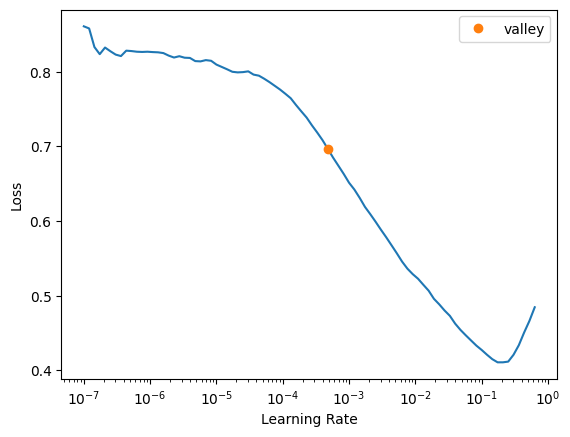

In [18]:
lr = learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.158367,0.127876,0.825902,00:01
1,0.102223,0.091832,0.843388,00:01
2,0.061518,0.061308,0.865027,00:01
3,0.041781,0.055904,0.869727,00:01
4,0.032635,0.052866,0.873443,00:01
5,0.027579,0.046841,0.885464,00:01
6,0.024914,0.044629,0.897268,00:01
7,0.021642,0.042728,0.899126,00:01
8,0.020009,0.044049,0.901093,00:01
9,0.018257,0.043320,0.908634,00:01


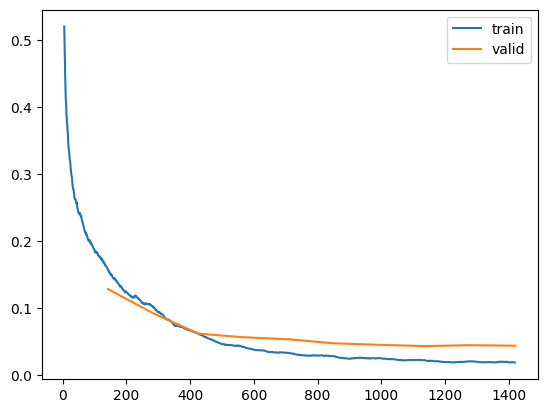

In [19]:
learn.fit(10, lr)
learn.recorder.plot_loss()

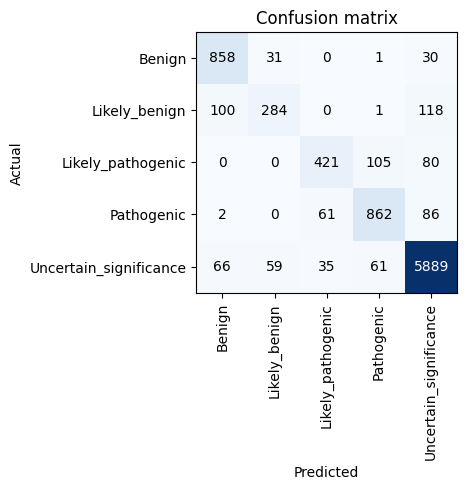

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [21]:
test_dl = dls.test_dl(df_test)
learn.validate(dl=test_dl)

(#2) [0.0407111681997776,0.9109110236167908]

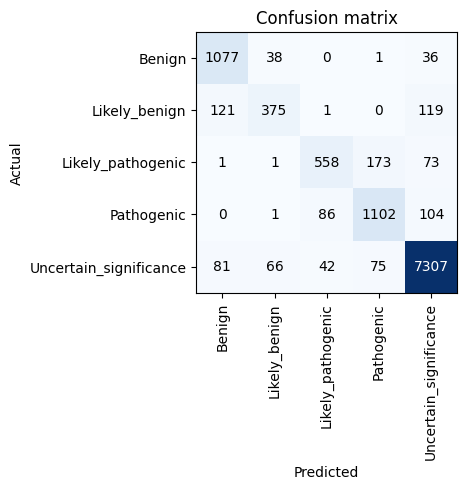

In [22]:
interp = ClassificationInterpretation.from_learner(learn, dl=test_dl)
interp.plot_confusion_matrix()

In [25]:
class PermutationImportance():
  "Calculate and plot the permutation importance"
  def __init__(self, learn:Learner, df=None, bs=None):
    "Initialize with a test dataframe, a learner, and a metric"
    self.learn = learn
    self.df = df
    bs = bs if bs is not None else learn.dls.bs
    if self.df is not None:
      self.dl = learn.dls.test_dl(self.df, bs=bs)
    else:
      self.dl = learn.dls[1]
    self.x_names = learn.dls.x_names.filter(lambda x: '_na' not in x)
    self.na = learn.dls.x_names.filter(lambda x: '_na' in x)
    self.y = dls.y_names
    self.results = self.calc_feat_importance()
    self.plot_importance(self.ord_dic_to_df(self.results))

  def measure_col(self, name:str):
    "Measures change after column shuffle"
    col = [name]
    if f'{name}_na' in self.na: col.append(name)
    orig = self.dl.items[col].values
    perm = np.random.permutation(len(orig))
    self.dl.items[col] = self.dl.items[col].values[perm]
    metric = learn.validate(dl=self.dl)[1]
    self.dl.items[col] = orig
    return metric

  def calc_feat_importance(self):
    "Calculates permutation importance by shuffling a column on a percentage scale"
    print('Getting base error')
    base_error = self.learn.validate(dl=self.dl)[1]
    self.importance = {}
    pbar = progress_bar(self.x_names)
    print('Calculating Permutation Importance')
    for col in pbar:
      self.importance[col] = self.measure_col(col)
    for key, value in self.importance.items():
      self.importance[key] = (base_error-value)/base_error #this can be adjusted
    return OrderedDict(sorted(self.importance.items(), key=lambda kv: kv[1], reverse=True))

  def ord_dic_to_df(self, dict:OrderedDict):
    return pd.DataFrame([[k, v] for k, v in dict.items()], columns=['feature', 'importance'])

  def plot_importance(self, df:pd.DataFrame, limit=20, asc=False, **kwargs):
    "Plot importance with an optional limit to how many variables shown"
    df_copy = df.copy()
    df_copy['feature'] = df_copy['feature'].str.slice(0,25)
    df_copy = df_copy.sort_values(by='importance', ascending=asc)[:limit].sort_values(by='importance', ascending=not(asc))
    ax = df_copy.plot.barh(x='feature', y='importance', **kwargs)
    for p in ax.patches:
      ax.annotate(f'{p.get_width():.4f}', ((p.get_width() * 1.005), p.get_y()  * 1.005))

Getting base error


Calculating Permutation Importance


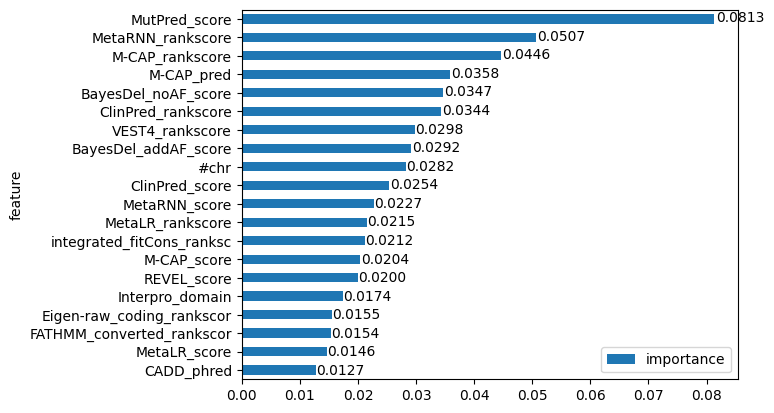

In [27]:
res = PermutationImportance(learn, df_concat.sample(frac=0.5).reset_index(drop=True) , bs=512)

In [31]:
sort = dict(sorted(res.importance.items(), key=lambda item: item[1]))

In [136]:
restricted_list = list(sort.keys())[-70:]

In [137]:
restricted_df = df_concat[restricted_list]

In [138]:
num_cols = restricted_df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = restricted_df.select_dtypes(include=[object]).columns.tolist()
restricted_df = pd.concat([df_concat['clinvar_clnsig'], restricted_df], axis=1)
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df))

In [139]:
to_restricted = TabularPandas(restricted_df, procs=[Categorify, FillMissing],
                   cat_names = cat_cols,
                   cont_names = num_cols,
                   y_names='clinvar_clnsig',
                    y_block=CategoryBlock(),
                   splits=splits)

In [140]:
dls_r = to_restricted.dataloaders(bs=1024)
dls_r.show_batch()

,M-CAP_pred,MutPred_score,BayesDel_addAF_score,VEST4_rankscore,ClinPred_rankscore,BayesDel_noAF_score,M-CAP_rankscore,MetaRNN_rankscore,clinvar_clnsig
0,D,0.14,0.000000,0.60241,0.51026,0.000000,0.79226,0.56818,Uncertain_significance
1,0,0,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,Benign
2,D,0.517,0.073379,0.72925,0.39803,0.036756,0.93148,0.65763,Uncertain_significance
3,0,0,0.625005,0.00000,0.00000,0.660000,0.00000,0.00000,Pathogenic
4,D,0.865,0.000000,0.91276,0.88754,0.000000,0.75556,0.95503,Uncertain_significance
5,D,0,-0.261683,0.19459,0.08121,-0.416694,0.51857,0.33855,Uncertain_significance
6,D,0.197,0.324080,0.57006,0.66564,0.227742,0.95369,0.67236,Uncertain_significance
7,D,0.872,0.208315,0.93135,0.86343,0.346167,0.92315,0.97403,Uncertain_significance
8,D,0.598,0.000000,0.60918,0.35382,0.000000,0.69164,0.61412,Uncertain_significance
9,D,0,0.000000,0.69125,0.38003,0.000000,0.92366,0.79801,Uncertain_significance


In [141]:
learn_r = tabular_learner(dls_r, metrics=accuracy, loss_func=FocalLossFlat(gamma=5))

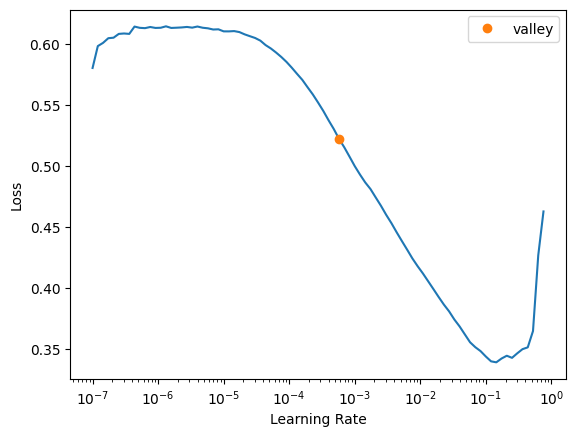

In [142]:
lr = learn_r.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.063059,0.095396,0.859804,00:00
1,0.063335,0.094701,0.861522,00:00
2,0.063675,0.096429,0.852537,00:00
3,0.063677,0.096088,0.857955,00:00
4,0.063387,0.091677,0.850159,00:00
5,0.063020,0.096380,0.846591,00:00
6,0.063367,0.095890,0.843948,00:00
7,0.063157,0.100994,0.841041,00:00
8,0.063199,0.092203,0.861786,00:00
9,0.062498,0.093392,0.856237,00:00


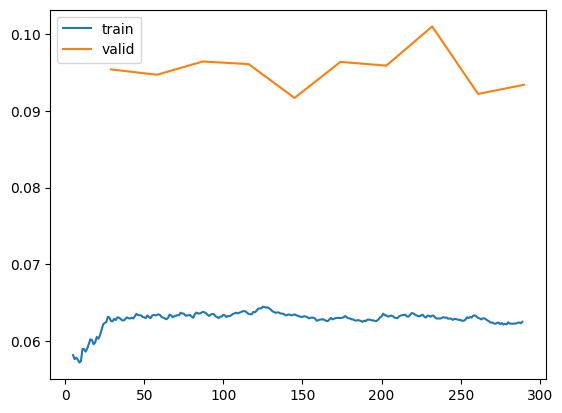

In [147]:
learn_r.fit(10, lr)
learn_r.recorder.plot_loss()

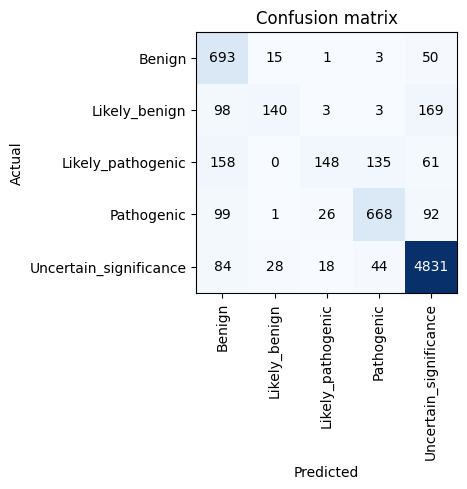

In [148]:
interp = ClassificationInterpretation.from_learner(learn_r)
interp.plot_confusion_matrix()

In [149]:
test_dl = dls_r.test_dl(df_test)
learn_r.validate(dl=test_dl)

(#2) [0.09321659803390503,0.8574925661087036]

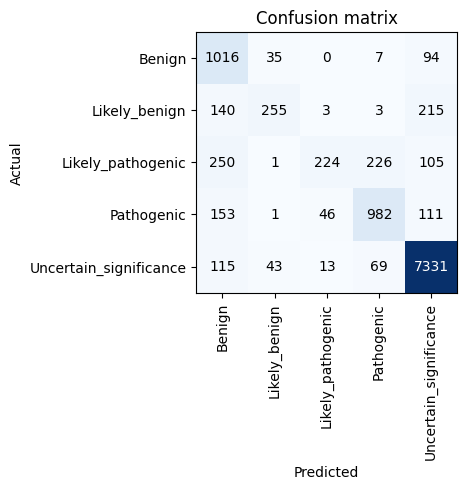

In [150]:
interp = ClassificationInterpretation.from_learner(learn_r, dl=test_dl)
interp.plot_confusion_matrix()

In [151]:
classes = {0: 1, 1: 1, 2: 2, 3: 2, 4: 3}

class GroupLoss(nn.Module):
    def __init__(self, gamma = 2.0):
        super(GroupLoss, self).__init__()
        self.gamma = gamma

    def forward(self, inp, targ):
        sm_acts = torch.softmax(inp, dim=1)
        losses = []
        for i in range(len(targ)):
            target_class = classes[targ[i].item()]
            pred_class = sm_acts[i].argmax().item()
            if target_class != classes[pred_class]:
                losses.append(torch.pow(1 - sm_acts[i][targ[i].item()], self.gamma) * torch.log(sm_acts[i][targ[i].item()]) * 3)
            else:
                losses.append(torch.pow(1 - sm_acts[i][targ[i].item()], self.gamma) * torch.log(sm_acts[i][targ[i].item()]))
      
        return -torch.stack(losses).mean()

In [155]:
learn = tabular_learner(dls, metrics=accuracy, loss_func=GroupLoss(gamma=6))

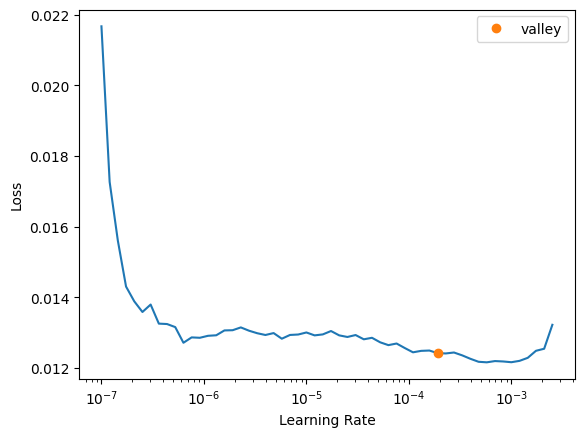

In [160]:
torch.cuda.empty_cache()
lr = learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.011001,0.073641,0.919344,00:22
1,0.010128,0.075200,0.920328,00:22
2,0.010116,0.083395,0.898033,00:21
3,0.010253,0.074762,0.921093,00:21
4,0.009553,0.075740,0.920546,00:21
5,0.008864,0.076307,0.921749,00:22
6,0.008636,0.077262,0.921202,00:22
7,0.008298,0.080066,0.921749,00:22
8,0.008556,0.080292,0.921858,00:22
9,0.008279,0.081512,0.914098,00:22


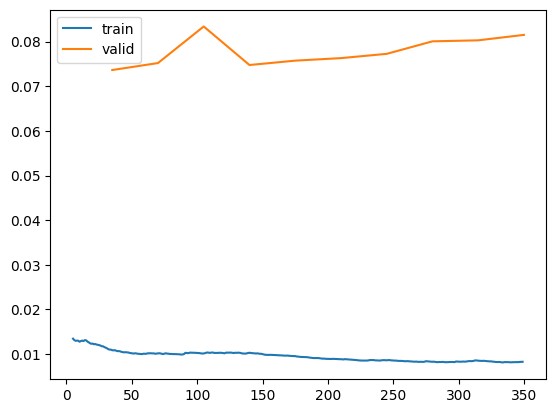

In [161]:
learn.fit(10, lr)
learn.recorder.plot_loss()

In [164]:
test_dl = dls.test_dl(df_test)
learn.validate(dl=test_dl)

(#2) [0.07973189651966095,0.914145827293396]

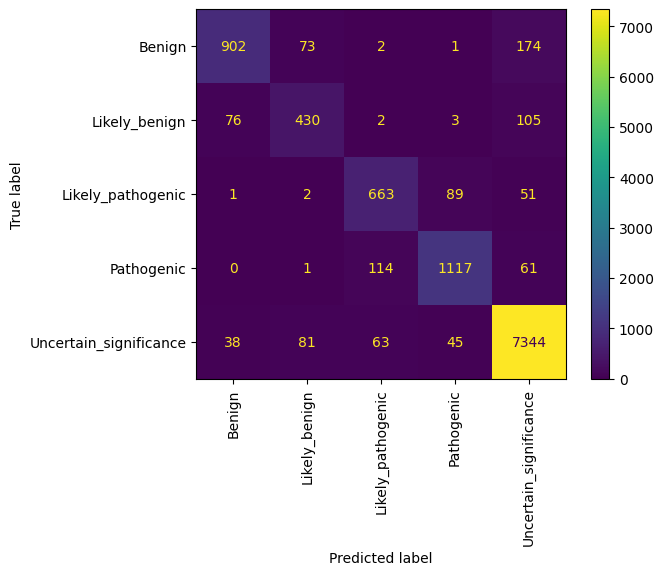

In [166]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

preds, targets = learn.get_preds(dl=test_dl)
pred_classes = np.argmax(preds, axis=1)

# Flattening delle etichette di classe
true_classes = targets.squeeze().numpy()

# Calcola la matrice di confusione
conf_matrix = confusion_matrix(true_classes, pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dls.vocab)
disp.plot(xticks_rotation='vertical')

*Machine Learning*

In [84]:
to_test = TabularPandas(df_test, procs=[Categorify, FillMissing], cat_names = cat_cols, cont_names = num_cols, y_names='clinvar_clnsig', y_block=CategoryBlock())

In [85]:
X_test = to_test.train.xs
y_test = to_test.train.ys.values.ravel()

*Gradient Boosting*

In [73]:
splits = RandomSplitter(valid_pct=0.0, seed=42)(range_of(df_concat))
df_data = df_concat.drop(columns=['clinvar_clnsig'], inplace=False)
num_cols = df_data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_data.select_dtypes(include=[object]).columns.tolist()
df_concat = df_concat.sample(frac=1).reset_index(drop=True)

to2 = TabularPandas(df_concat, procs=[Categorify, FillMissing],
                   cat_names = cat_cols,
                   cont_names = num_cols,
                   y_names='clinvar_clnsig',
                    y_block=CategoryBlock(),
                   splits=splits)

X_train, y_train = to2.train.xs, to2.train.ys.values.ravel()

In [39]:
gb = GradientBoostingClassifier()

In [40]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [41]:
p = gb.predict(X_test)

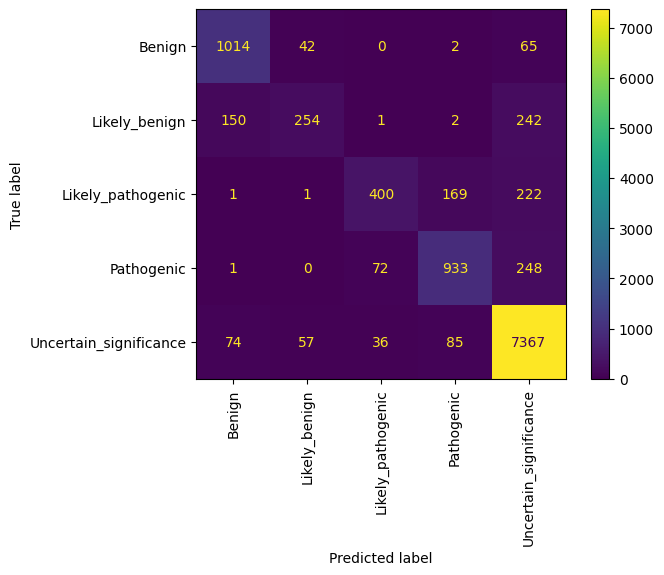

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dls.vocab)
disp.plot(xticks_rotation='vertical')

*Random Forest*

In [70]:
rfc = RandomForestClassifier(random_state=42, max_features='log2', max_depth=30, criterion='gini', min_samples_leaf=1)

In [44]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', random_state=42)

In [45]:
pred=rfc.predict(X_test)

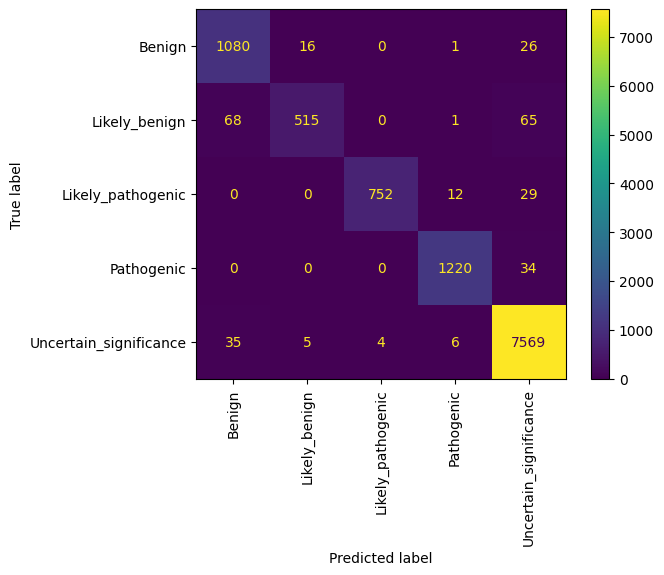

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dls.vocab)
disp.plot(xticks_rotation='vertical')

*Voting classifier*

In [74]:
class FastAITabularClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, dls, layers, metrics):
        self.dls = dls
        self.layers = layers
        self.metrics = metrics
        self.learn = None

    def fit(self, X, y):
        # Convert X, y into a FastAI DataLoaders
        self.learn = tabular_learner(self.dls, metrics=self.metrics, loss_func=FocalLossFlat(gamma=5))
        lr = self.learn.lr_find()
        self.learn.fit(15, lr) # You can adjust the training method and epochs
        return self

    def predict_proba(self, X):
        dl = self.dls.test_dl(X, with_labels=False)
        preds, _ = self.learn.get_preds(dl=dl)
        return preds.numpy()
        #return preds.argmax(dim=1).numpy()

In [75]:
fastai_model = FastAITabularClassifier(dls, layers=[200,100], metrics=accuracy)

In [76]:
voting_clf = VotingClassifier(estimators=[
    ('rf', rfc),
    ('gbm', gb),
    ('fastai', fastai_model)
], voting='soft')

epoch,train_loss,valid_loss,accuracy,time
0,0.246409,0.204916,0.789945,00:00
1,0.191152,0.156623,0.823934,00:00
2,0.159333,0.132777,0.828197,00:00
3,0.133137,0.111416,0.845792,00:00
4,0.109396,0.102002,0.849290,00:00
5,0.090514,0.083643,0.848634,00:00
6,0.073765,0.067679,0.861530,00:00
7,0.059445,0.061273,0.877486,00:00
8,0.049156,0.053373,0.867760,00:00
9,0.039729,0.046392,0.887650,00:00


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=30,
                                                     max_features='log2',
                                                     random_state=42)),
                             ('gbm', GradientBoostingClassifier()),
                             ('fastai',
                              FastAITabularClassifier(dls=<fastai.tabular.data.TabularDataLoaders object at 0x7fd31234a5c0>,
                                                      layers=[200, 100],
                                                      metrics=<function accuracy at 0x7fd32b793c70>))],
                 voting='soft')

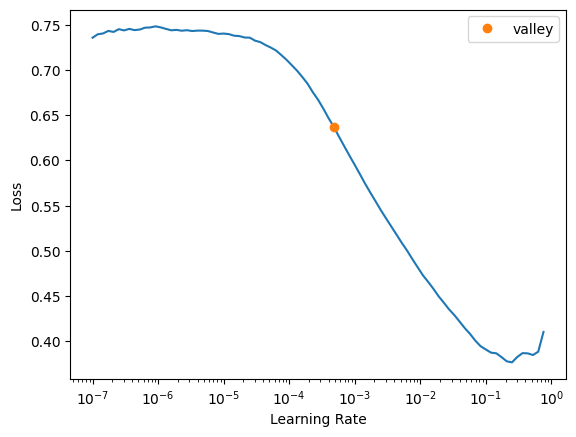

In [77]:
voting_clf.fit(X_train, y_train)

0.9452701521244973

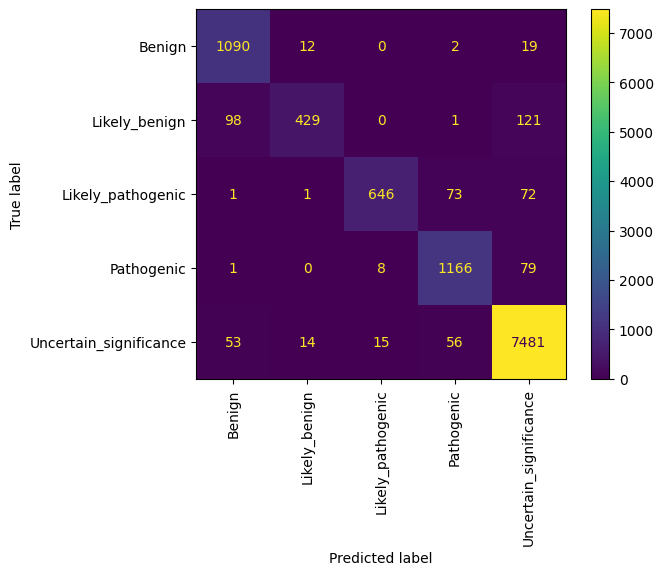

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

X_test = to_test.train.xs
y_test = to_test.train.ys.values.ravel()
predictions =  voting_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dls.vocab)
disp.plot(xticks_rotation='vertical')
accuracy_score(y_test, predictions)

*XGBoost*

In [78]:
xgb_class = xgb.XGBClassifier(
        n_jobs=multiprocessing.cpu_count() // 2, tree_method="hist",
        max_depth=6, n_estimators=200, random_state=42
    )

In [ ]:
xgb_class.fit(X_train, y_train)

0.9739464941423326

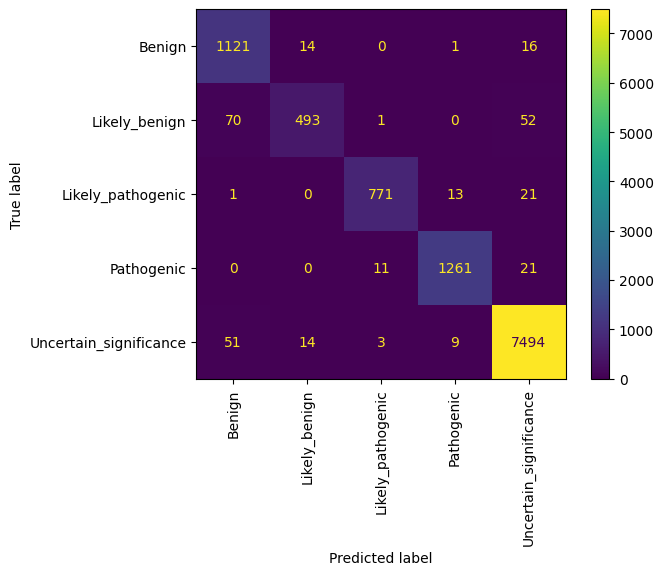

In [25]:
X_test = to_test.train.xs
y_test = to_test.train.ys.values.ravel()
predictions =  xgb_class.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dls.vocab)
disp.plot(xticks_rotation='vertical')
accuracy_score(y_test, predictions)

*Voting classifier con XGBoost e Random forest*

In [80]:
voting_clf = VotingClassifier(estimators=[
    ('rf', rfc),
    ('xgb', xgb_class),   
], voting='soft')

In [81]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=30,
                                                     max_features='log2',
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=8,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

0.9749082007343941

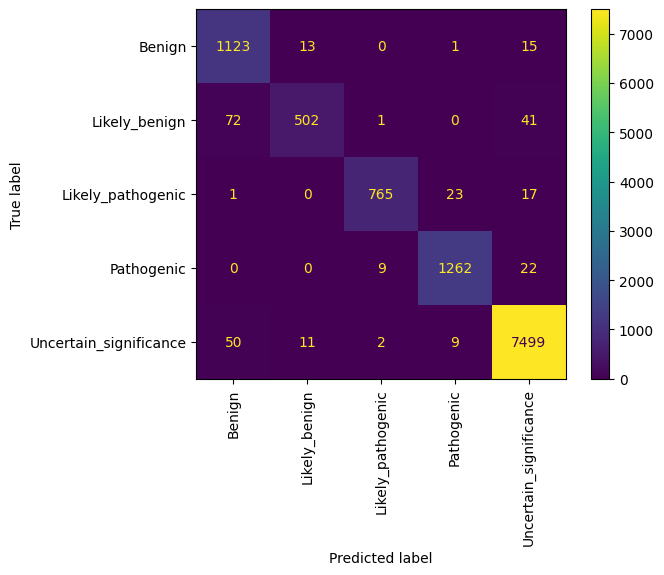

In [88]:
X_test = to_test.train.xs
y_test = to_test.train.ys.values.ravel()
predictions =  voting_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dls.vocab)
disp.plot(xticks_rotation='vertical')
accuracy_score(y_test, predictions)